## 딥러닝 영상처리
# CNN 개념

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

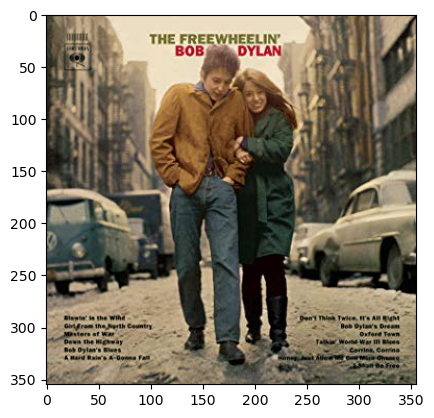

In [3]:
img = plt.imread('bob_dylan.jpg')
plt.imshow(img)

In [4]:
img.shape # (높이, 넓이, RGB채널)

(355, 355, 3)

In [5]:
img.min(), img.max()

(0, 255)

In [6]:
img[:5, :5]

array([[[57, 55, 40],
        [71, 69, 54],
        [74, 71, 54],
        [66, 63, 46],
        [65, 60, 41]],

       [[51, 49, 34],
        [67, 65, 50],
        [73, 70, 53],
        [70, 67, 50],
        [72, 67, 48]],

       [[54, 52, 37],
        [66, 64, 49],
        [70, 67, 50],
        [68, 65, 48],
        [72, 67, 48]],

       [[66, 64, 49],
        [70, 68, 53],
        [66, 63, 46],
        [61, 58, 41],
        [67, 62, 43]],

       [[72, 70, 55],
        [72, 70, 55],
        [66, 63, 46],
        [63, 60, 43],
        [69, 64, 45]]], dtype=uint8)

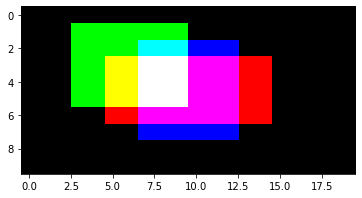

In [10]:
a = np.zeros([10,20,3]) # 높이가 10픽셀, 넓이가 20픽셀, 채널이 3개(RGB)
a[3:7, 5:15, 0] = 1 # Red 채널
a[1:6, 3:10, 1] = 1 # Green 채널
a[2:8, 7:13, 2] = 1 # Blue 채널
plt.imshow(a)

### CNN 구조

<img src='https://community.arm.com/cfs-file/__key/communityserver-blogs-components-weblogfiles/00-00-00-21-42/Neural-Network-Model-Definition.jpg' />
(출처: https://community.arm.com/developer/ip-products/processors/b/processors-ip-blog/posts/deploying-convolutional-neural-network-on-cortex-m-with-cmsis-nn?CommentSortBy=CreatedDate&CommentSortOrder=Descending )<br>

<img src='cifar-10.jpg' />
(출처: https://arxiv.org/pdf/1611.04905.pdf )

<img src="https://ren-fengbo.lab.asu.edu/sites/default/files/styles/panopoly_image_full/public/fpga_accel_bcnn_fig_1.png?itok=bhU2jU8y" />
(출처: https://ren-fengbo.lab.asu.edu/content/gpu-outperforming-fpga-accelerator-architecture-binary-convolutional-neural-networks)

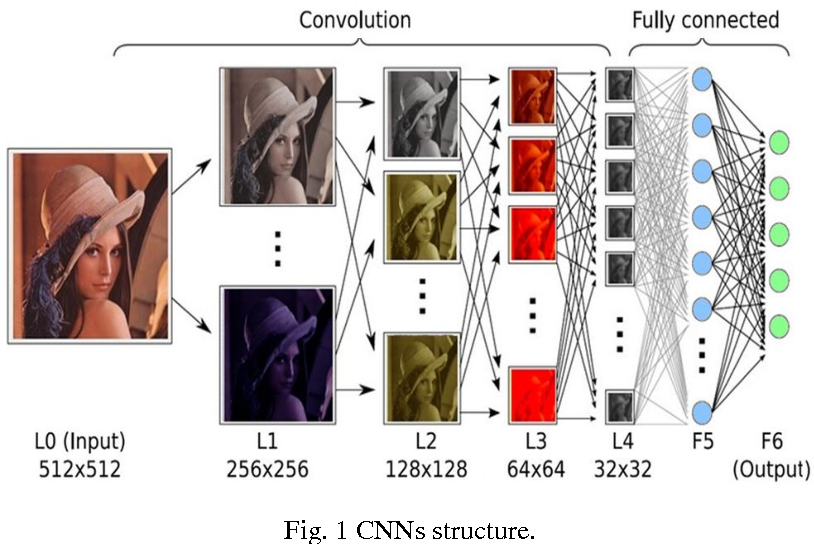

### Convolution

<img src="conv_1.jpg" />

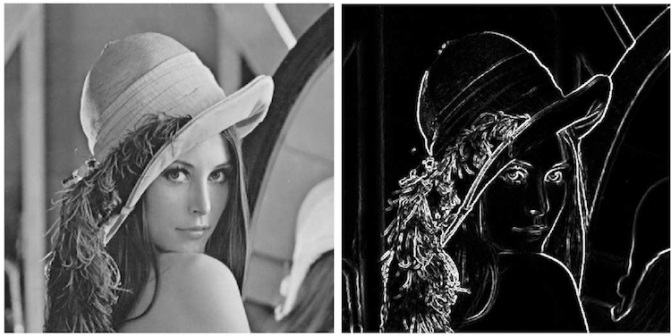

### Pooling (Resizing)

<img src="pooling_1.jpg" />

### CNN 맛보기
- MNIST 적용

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
X_train = X_train.reshape(60000,28,28,1)/255
X_test = X_test.reshape(10000,28,28,1)/255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), padding='same',
                    activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 68,938
Trainable params: 68,938
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 8s 21ms/step - loss: 0.2769 - acc: 0.9189 - val_loss: 0.0868 - val_acc: 0.9749
Epoch 2/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0733 - acc: 0.9776 - val_loss: 0.0635 - val_acc: 0.9822
Epoch 3/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0523 - acc: 0.9842 - val_loss: 0.0514 - val_acc: 0.9847
Epoch 4/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0414 - acc: 0.9872 - val_loss: 0.0501 - val_acc: 0.9852
Epoch 5/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0337 - acc: 0.9891 - val_loss: 0.0434 - val_acc: 0.9872
Epoch 6/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0435 - val_acc: 0.9862
Epoch 7/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0425 - val_acc: 0.9869
Epoch 8/20
375/375 [==============================] - 8s 21ms/step - 

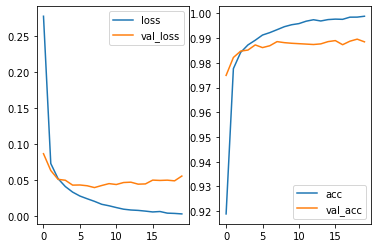

In [17]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [18]:
pred_y = model.predict(X_test)
pred_y.shape

(10000, 10)

In [19]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9892